In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Nacho\JupyterNotebooks\SF_Salaries\Salaries.csv", header=0, delimiter=',')

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


We could start by dropping the 'Notes' column, since it only has null values. Then we took a look at 'Agency' and found out that the only value is 'San Francisco', so that one could be dropped as well. We also thought that since there are just 600 'BasePay' null values, we could delete those rows without hesitation.

<AxesSubplot:>

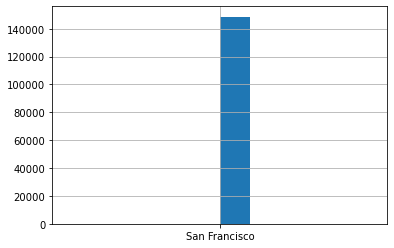

In [6]:
df.Agency.hist()

In [7]:
df = df.drop(['Notes', 'Agency'], axis=1)
df = df[df.BasePay.notnull()]

After that, we wondered why some columns such as 'BasePay', 'OvertimePay', 'OtherPay' or 'Benefits' had an object data type. We discovered that 4 entries have value 'Not provided'. Since those rows gave us absolutely no data, we dropped them and changed the data types.

In [8]:
df['BasePay'].eq('Not Provided').sum()

4

In [9]:
df = df[df.BasePay.ne('Not Provided')]

In [10]:
df.BasePay = df.BasePay.astype('float64')
df.OvertimePay = df.OvertimePay.astype('float64')
df.OtherPay = df.OtherPay.astype('float64')
df.Benefits = df.Benefits.astype('float64')

As per 'Benefits', we saw that some 40k entries have a null value: those are way too many to drop, so we thought that maybe when 'Benefits' is null, then it means there were no benefits, so 'TotalPayBenefits' should be equal to 'Benefits'. After proving it right, we set all null values in 'Benefits' to 0.

In [11]:
(df.TotalPay[df.Benefits.isnull()] == df.TotalPayBenefits[df.Benefits.isnull()]).all()

True

In [12]:
df.loc[df.Benefits.isnull(), 'Benefits'] = 0

In [13]:
df = df[df.TotalPay.gt(0) + df.TotalPayBenefits.gt(0) + df.BasePay.gt(0)]
df = df.reset_index(drop=True)

Now the data is pretty clean, but we thought it would be a good idea to have every 'JobTitle' and 'EmployeeName' in uppercase letters, and to delete all extra spaces which could mess up some string comprehension we might take on later.

In [14]:
df.JobTitle = df.JobTitle.str.upper()
df.EmployeeName = df.EmployeeName.str.upper()
df.JobTitle = df.JobTitle.replace(to_replace=r'  +', value=' ', regex=True)
df.EmployeeName = df.EmployeeName.replace(to_replace=r'  +', value=' ', regex=True)

Now let's get into the Data Science. Our target value will be 'TotalPay' (or 'TotalPayBenefits'), so we should see its face and some statistics about it.

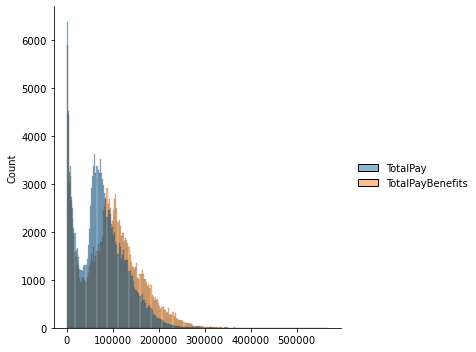

In [15]:
sns.displot([df.TotalPay, df.TotalPayBenefits])

In [16]:
df.TotalPay.quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

0.250     37018.38500
0.500     71652.85500
0.750    106036.74250
0.900    142626.71600
0.990    207090.54090
0.999    273641.55966
Name: TotalPay, dtype: float64

In [17]:
df.TotalPayBenefits.quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

0.250     45121.40000
0.500     92685.39500
0.750    133099.21000
0.900    177221.20000
0.990    253916.29150
0.999    325119.39866
Name: TotalPayBenefits, dtype: float64

It has a rather odd distribution, but if we split the data around the anual minimum wage for a full time job it becomes more gaussian-y, although it is still right-tailed.

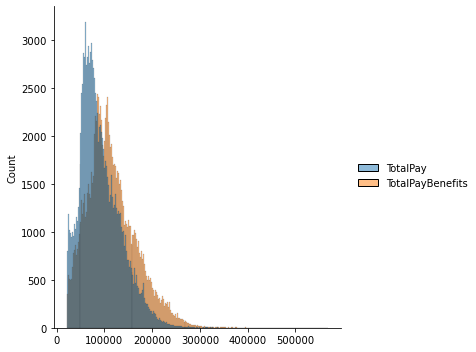

In [18]:
sns.displot([df.TotalPay[df.BasePay > 2.1e4], df.TotalPayBenefits[df.BasePay > 2.1e4]])

In [19]:
df.TotalPay[df.BasePay > 2.1e4].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

0.250     60773.93500
0.500     82681.55000
0.750    116304.13000
0.900    150336.97600
0.990    212495.56720
0.999    280140.64402
Name: TotalPay, dtype: float64

In [20]:
df.TotalPayBenefits[df.BasePay > 2.1e4].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

0.250     79124.30500
0.500    107040.18000
0.750    145067.14500
0.900    185411.96600
0.990    259964.55760
0.999    334985.81606
Name: TotalPayBenefits, dtype: float64

Let's check out the other 'half'. We can't even see it properly, but there are a few employees with a lower than minimum wage base salary but still end up making north of 200k, so its over 9 times their base salary in overtime pay (or other pay). Maybe those could be fire fighters or very specialised doctors?

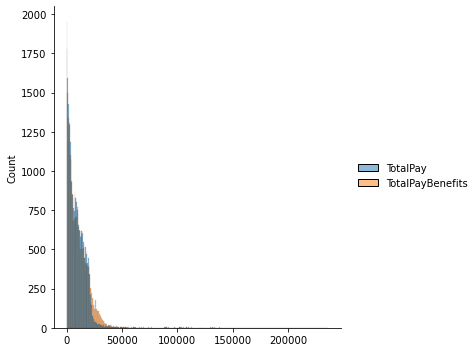

In [21]:
sns.displot([df.TotalPay[df.BasePay < 2.1e4], df.TotalPayBenefits[df.BasePay < 2.1e4]])

In [22]:
df.TotalPay[df.BasePay < 2.1e4].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

0.250      2827.92500
0.500      7558.09000
0.750     13709.62500
0.900     18712.04600
0.990     31010.43060
0.999    114211.26334
Name: TotalPay, dtype: float64

In [23]:
df.TotalPayBenefits[df.BasePay < 2.1e4].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

0.250      3069.69000
0.500      8198.36000
0.750     15119.95500
0.900     21727.36400
0.990     37996.69820
0.999    119314.41352
Name: TotalPayBenefits, dtype: float64

In [24]:
df.iloc[df.TotalPay[df.BasePay < 2.1e4].sort_values().index[-10:]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
81549,81554,MICHAEL S BECKER,POLICE OFFICER 3,20111.00,8572.37,113903.75,5867.73,142587.12,148454.85,2013,NaN
119005,119614,JOANNE M HOEPER,CHIEF ATTY1 (CIVIL & CRIMINAL),9650.20,0.00,133371.58,2714.08,143021.78,145735.86,2014,PT
43794,43798,MICHAEL BELLO,"CAPTAIN, FIRE SUPPRESSION",15114.60,28083.96,104066.89,5065.54,147265.45,152330.99,2012,NaN
1887,1888,ANTONIO CASILLAS,"INSPECTOR III, (POLICE DEPARTMENT)",9868.00,77595.99,67354.28,0.00,154818.27,154818.27,2011,NaN
113159,113768,MARIA F REILLY,SENIOR MUSEUM REGISTRAR,20465.01,0.00,137226.50,36367.22,157691.51,194058.73,2014,PT
1669,1670,JOSEPH TOOMEY,"INSPECTOR III, (POLICE DEPARTMENT)",9867.93,62600.83,85688.69,0.00,158157.45,158157.45,2011,NaN
39840,39844,ALVIN WONG,INSPECTOR 3,15369.11,72885.66,89505.39,4624.93,177760.16,182385.09,2012,NaN
40137,40141,MICHAEL KEARNEY,"BATTLION CHIEF, FIRE SUPPRESSI",0.00,31865.11,147243.87,216.65,179108.98,179325.63,2012,NaN
39610,39614,FRANK CARDINALE,ASSISTANT DEPUTY CHIEF 2,0.00,8859.00,175675.66,189.79,184534.66,184724.45,2012,NaN
36885,36889,JAMES HARRIGAN,CHIEF ATTY1 (CIVIL & CRIMINAL),15158.50,0.00,206752.00,14074.28,221910.50,235984.78,2012,NaN


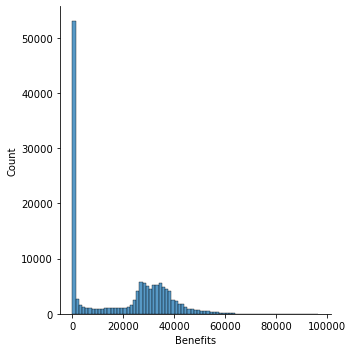

In [25]:
sns.displot(df.Benefits)

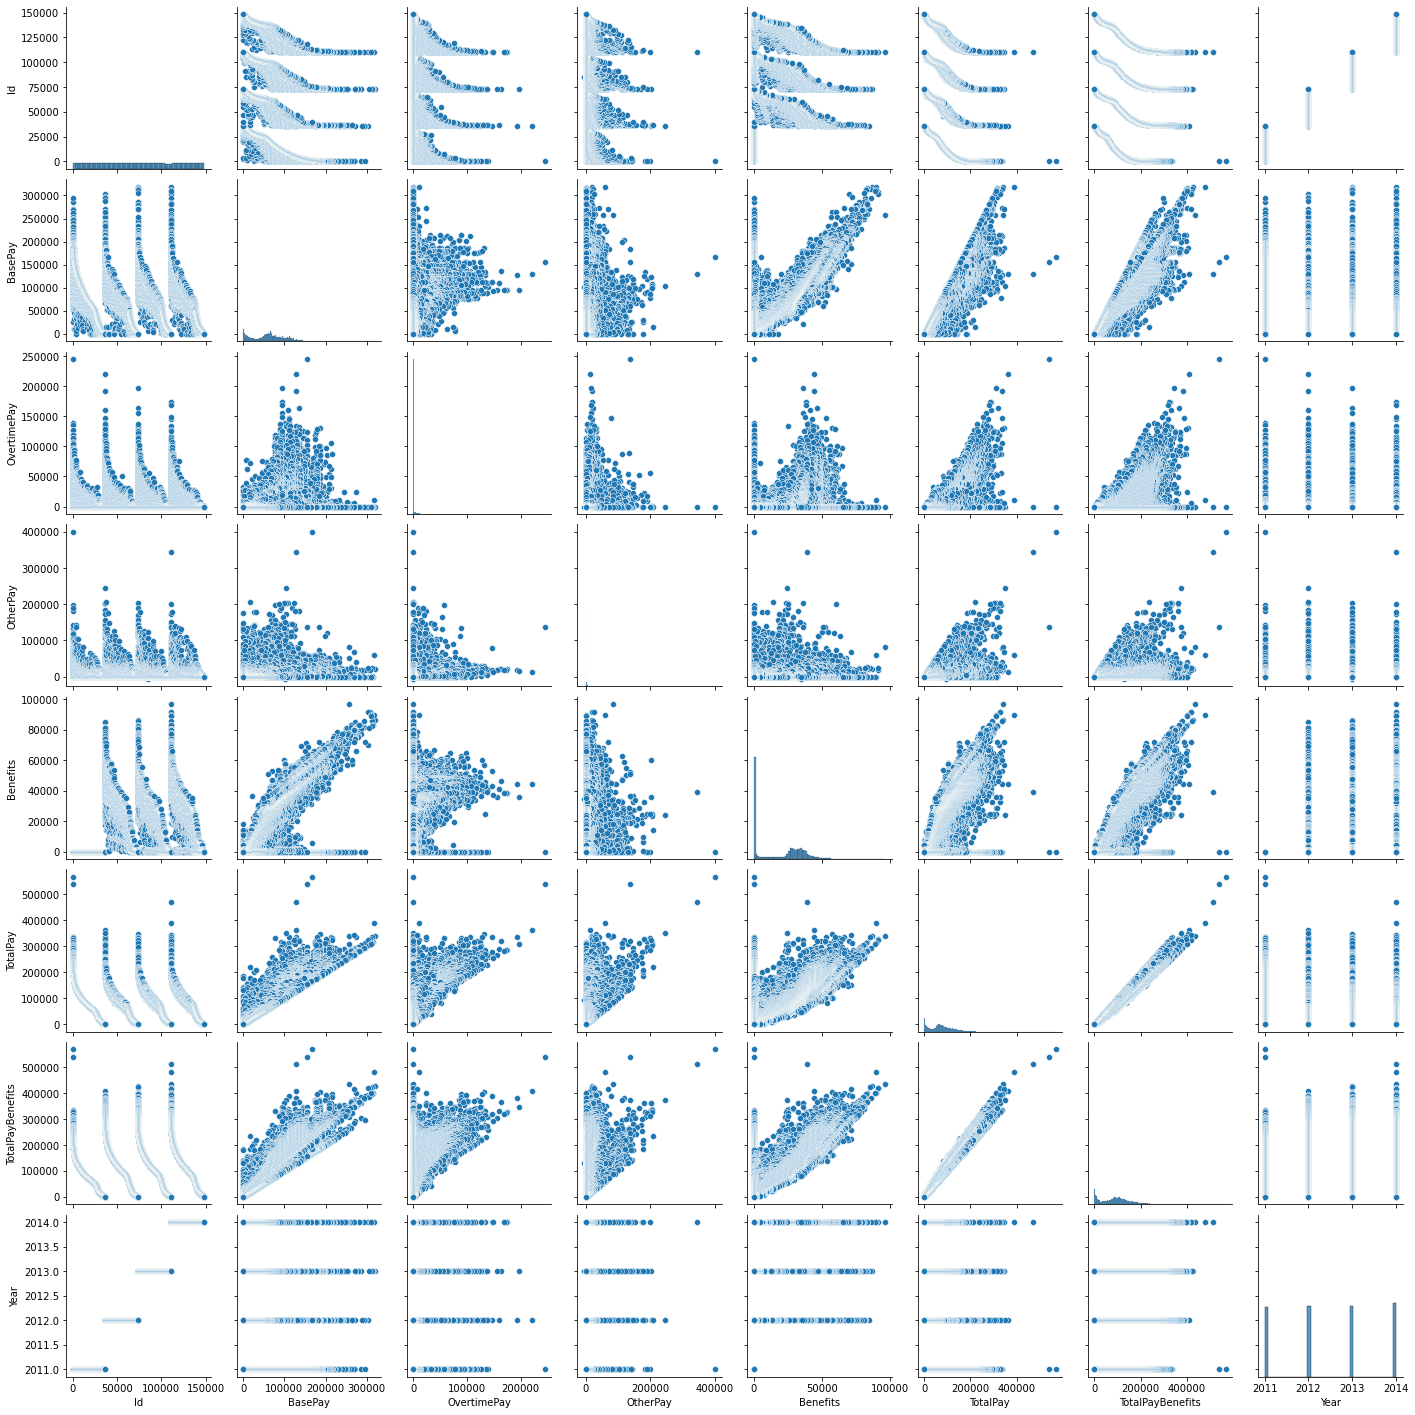

In [29]:
sns.pairplot(df)

<AxesSubplot:>

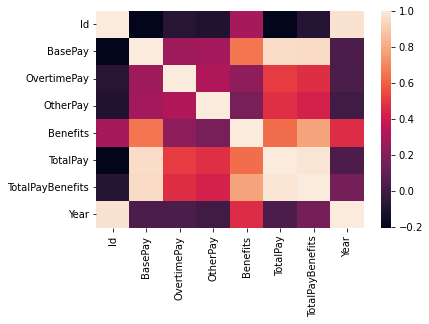

In [31]:
sns.heatmap(df.corr())

Some inflation shit

In [16]:
df.TotalPay[df.Year.eq(2011)].mean()

71744.10387123664

In [17]:
print(df.TotalPay[df.Year.eq(2011)].mean()*1.03)
print(df.TotalPay[df.Year.eq(2012)].mean())

73896.42698737375
74113.26226513737


In [18]:
print(df.TotalPay[df.Year.eq(2012)].mean()*1.017)
print(df.TotalPay[df.Year.eq(2013)].mean())

75373.18772364469
78808.28504148757


In [19]:
print(df.TotalPay[df.Year.eq(2013)].mean()*1.015)
print(df.TotalPay[df.Year.eq(2014)].mean())

79990.40931710988
75471.83691230064


In [29]:
data = df.JobTitle.to_numpy().flatten()

In [54]:
a = ' '.join(df.JobTitle).split()
a = [e for e in a if len(e) > 3]
Counter(a).most_common(20)

[('NURSE', 13249),
 ('TRANSIT', 12054),
 ('WORKER', 10151),
 ('OFFICER', 10011),
 ('OPERATOR', 9675),
 ('CLERK', 9303),
 ('SENIOR', 9197),
 ('POLICE', 7466),
 ('ASSISTANT', 7188),
 ('PUBLIC', 6512),
 ('SPECIAL', 5913),
 ('SERVICE', 5042),
 ('REGISTERED', 4944),
 ('DEPUTY', 4591),
 ('ANALYST', 4079),
 ('MANAGER', 4043),
 ('HEALTH', 3886),
 ('SUPERVISOR', 3367),
 ('ENGINEER', 3255),
 ('CUSTODIAN', 3205)]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data)
X_train_counts.shape

(148045, 854)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(148045, 854)

In [35]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(148045, 854)

Trying to classify people based on their jobs

In [22]:
df.JobTitle.nunique()

1632

In [21]:
df.JobTitle.unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'FORENSIC TOXICOLOGIST SUPERVIS', 'CONVERSION', 'CASHIER 3'],
      dtype=object)

In [22]:
jobs = ['PHYSICIAN',
        'NURSE',
        'HEALTH',
        'MEDICAL',
        'PSYCH',
        'SCHOOL',
        'TEACHER',
        'TRANSIT',
        'ATTORNEY',
        'JUDGE',
        'LEGAL',
        'ATTORNEY',
        'LIBRARIAN',
        'PHARMACIST',
        'ENGINEER',
        'CLEANER',
        'CLERK',
        'ACCOUNTANT',
        'COOK',
        'CHEF',
        'POLICE',
        'INVESTIGATOR',
        'FIRE'
]

In [23]:
s = 0
for job in jobs:
    s += df.JobTitle.str.contains(job).sum()
print(s)

70695


In [24]:
df['JobTitle'].str.contains('CAPTAIN [^I]').sum()

101

In [25]:
df['JobTitle'].str.contains('CAPTAIN III').sum()

37

In [26]:
df['JobTitle'].str.contains('CHIEF').sum()

624

In [27]:
df['JobTitle'].str.contains('MANAGER').sum()

4097

In [28]:
df['JobTitle'].str.contains('SENIOR').sum()

9825

In [29]:
un, idx, cn = np.unique(df.JobTitle, return_index=True, return_counts=True)
print(un[np.argsort(cn)][::-1][:50])

['TRANSIT OPERATOR' 'SPECIAL NURSE' 'REGISTERED NURSE' 'CUSTODIAN'
 'FIREFIGHTER' 'RECREATION LEADER' 'DEPUTY SHERIFF'
 'PUBLIC SVC AIDE-PUBLIC WORKS' 'POLICE OFFICER 3'
 'PATIENT CARE ASSISTANT' 'PUBLIC SERVICE TRAINEE'
 'ATTORNEY (CIVIL/CRIMINAL)' 'POLICE OFFICER' 'PORTER' 'GENERAL LABORER'
 'GARDENER' 'POLICE OFFICER 2' 'PARKING CONTROL OFFICER' 'LIBRARY PAGE'
 'SENIOR CLERK' 'SENIOR CLERK TYPIST' 'SERGEANT 3' 'ELIGIBILITY WORKER'
 'CLERK' 'EMT/PARAMEDIC/FIREFIGHTER' 'LICENSED VOCATIONAL NURSE'
 'STATIONARY ENGINEER' 'NURSE PRACTITIONER' 'SENIOR ELIGIBILITY WORKER'
 'PROTECTIVE SERVICES WORKER' 'MUSEUM GUARD' 'TRANSIT SUPERVISOR'
 'SENIOR ADMINISTRATIVE ANALYST' 'POLICE OFFICER III'
 'MEDICAL EVALUATIONS ASSISTANT' 'JUNIOR CLERK' 'SCHOOL CROSSING GUARD'
 'TRUCK DRIVER' 'FOOD SERVICE WORKER' 'ELECTRICAL TRANSIT SYSTEM MECH'
 'ENGINEER' 'PS AIDE TO PROF' 'SENIOR ACCOUNT CLERK'
 'PUBL SVC AIDE-ASST TO PROF' 'LIEUTENANT, FIRE SUPPRESSION' 'MANAGER III'
 'AUTOMOTIVE MECHANIC' 'MENTAL HEA

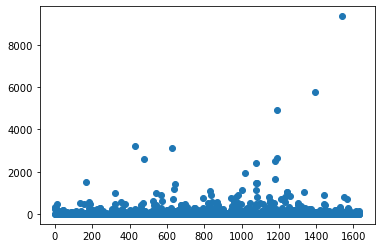

In [30]:
plt.scatter(x=list(range(len(cn))), y=cn)

In [31]:
df.JobTitle[df.JobTitle.str.contains('NURSE')].unique()

array(['NURSE MANAGER', 'NURSE PRACTITIONER', 'CLINICAL NURSE SPECIALIST',
       'NURSE MIDWIFE', 'REGISTERED NURSE', 'SPECIAL NURSE',
       'PUBLIC HEALTH NURSE', 'OPERATING ROOM NURSE',
       'LICENSED VOCATIONAL NURSE', 'CHIEF NURSERY SPECIALIST',
       'NURSES STAFFING ASSISTANT', 'NURSERY SPECIALIST'], dtype=object)

In [32]:
df.JobTitle[df.JobTitle.str.contains('NURSE')]

168                   NURSE MANAGER
203                   NURSE MANAGER
247                   NURSE MANAGER
255                   NURSE MANAGER
297                   NURSE MANAGER
                    ...            
148610                SPECIAL NURSE
148613                SPECIAL NURSE
148614    LICENSED VOCATIONAL NURSE
148615             REGISTERED NURSE
148625             REGISTERED NURSE
Name: JobTitle, Length: 13350, dtype: object

Some people didnt get payed at all, we dont want those entries

In [69]:
df = df[df.TotalPay.ge(1) + df.TotalPayBenefits.ge(1)]
df = df.reset_index(drop=True)

In [162]:
df.shape

(148017, 11)

Lets see who has more than one space in their name (aka more than just first name and last name)

## TODO: ELIMINAR TODAS LAS COMAS Y PARENTESIS DE LOS TRABAJOS

In [37]:
FirstName = df.EmployeeName.apply(lambda x: ''.join(x.split()[0]))

In [38]:
LastName = df.EmployeeName.apply(lambda x: ''.join(x.split()[1:]))

In [39]:
womens_names = pd.read_csv(r"C:\Users\admin\Desktop\Nacho\JupyterNotebooks\SF_Salaries\babies-first-names-top-100-girls.csv", header=0, delimiter=',')
mens_names = pd.read_csv(r"C:\Users\admin\Desktop\Nacho\JupyterNotebooks\SF_Salaries\babies-first-names-top-100-boys.csv", header=0, delimiter=',')

In [40]:
womens_names.FirstForename = womens_names.FirstForename.str.upper()
mens_names.FirstForename = mens_names.FirstForename.str.upper()

In [41]:
women = FirstName.isin(womens_names.FirstForename)
men = FirstName.isin(mens_names.FirstForename)

In [42]:
df.TotalPay[women].describe()

count     26227.000000
mean      68848.532588
std       48543.744896
min           0.000000
25%       27644.390000
50%       65621.520000
75%       97642.150000
max      390111.980000
Name: TotalPay, dtype: float64

In [43]:
df.TotalPay[men].describe()

count     40838.000000
mean      88175.169429
std       54463.455165
min        -618.130000
25%       51380.670000
50%       86853.470000
75%      124236.352500
max      538909.280000
Name: TotalPay, dtype: float64